# Hugging face

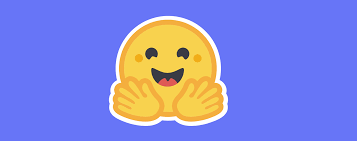

# TEXT GENERATION

### Simple off the shelf text generation

In [4]:
from transformers import pipeline

In [5]:
text_generation = pipeline("text-generation")

In [6]:
prefix_text = "The world is"

In [7]:
generated_text = text_generation(prefix_text, max_length=50, do_sample=False)[0]
print(generated_text['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The world is a better place if you're a good person.

I'm not saying that you should be a bad person. I'm saying that you should be a good person.

I'm not saying that you should be a bad


# TEXT GENERATION IN A LANGUAGE OF YOUR CHOICE

### Lets load a chinese model

In [8]:
from transformers import BertTokenizerFast, AutoModelWithLMHead

In [9]:
tokenzier = BertTokenizerFast.from_pretrained('bert-base-chinese')
model = AutoModelWithLMHead.from_pretrained('ckiplab/gpt2-base-chinese')

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/269k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/transformers/models/auto/modeling_auto.py:762: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/421M [00:00<?, ?B/s]

In [10]:
text_generation = pipeline("text-generation", model=model, tokenizer=tokenzier)

In [11]:
prefix_text = "我 想 要 去"
# chinese for I want to go

In [12]:
generated_text = text_generation(prefix_text, max_length=50, do_sample=False)[0]
print(generated_text['generated_text'])

Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我 想 要 去 看 看 。 」 他 說 : 「 我 們 不 能 說, 我 們 不 能 說, 我 們 不 能 說, 我 們 不 能 說, 我 們 不 能 說, 我 們 不 能 說, 我 們


# TEXT TRANSLATION

### lets look at the previously generated text

If you want to do a translation of any two custom languages, say English to Chinese, then you need a model that is specifically fine-tuned on that specific task. Fortunately, with the community established by Huggingface, you most likely don’t need to collect your own dataset and fine-tune your model on it. 

In [13]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-zh-en")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-zh-en")
text = generated_text['generated_text']
tokenized_text = tokenizer([text], return_tensors='pt')
translation = model.generate(**tokenized_text)
translated_text = tokenizer.batch_decode(translation, skip_special_tokens=False)[0]


Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/805k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/807k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.62M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/312M [00:00<?, ?B/s]

In [14]:
print(translated_text)

<pad> "We can't say, we can't say, we can't say, we can't say, we can't say, we can't say, we can't say, we can't say, we can't say, we can't say, we can't say,


Actual translation

![](https://github.com/fanbyprinciple/nlp-with-pytorch/hugging_face/actual_translation.png)

# QUESTION ANSWERING

### with context of your choice

In [15]:
question_answering = pipeline("question-answering")

Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

This will create a model pretrained on question answering as well as its tokenizer in the background. The default model used in this case is DistilBERT-base, which is fine-tuned on the SQuAD dataset. You can learn more about DistilBERT in its paper.



In [35]:
question_answering = pipeline("question-answering")

context = """
Machine learning (ML) is the study of computer algorithms that improve automatically through experience. It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so. Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.
"""

context1 = "Finding love isn't easy. Not everyone finds a partner. In order to find a partner it is necessary that we are self satisfied and okay with living with yourself"

In [38]:
question = "What isn't easy?"

result = question_answering(question=question, context=context1)
print(result['answer'])
print(result['score'])


# correct answer!

Finding love
0.9762855172157288


# QUESTION ANSWERING IN A LANGUAGE OF YOUR CHOICE

### again lets try chinese

In [15]:
question_answering = pipeline("question-answering", model="mrm8488/bert-multi-cased-finetuned-xquadv1",
    tokenizer="mrm8488/bert-multi-cased-finetuned-xquadv1")

Downloading:   0%|          | 0.00/657 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/711M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

In [21]:
context = """机器学习是人工智能的一个分支。 是个人很热门的专业。"""
## Machine Learning is a branch of Artificial Intelligence. It is a popular major.

In [22]:
question = "机器学习是什么的分支？"
## What is Machine Learning a branch of?

In [23]:
result = question_answering(question=question, context=context)

print(result['answer'])
print(result['score'])

。 是个人很热门的专业。
0.008478778414428234


### Lets translate it back so that we answer was

In [24]:
text = result['answer']
print(text)
tokenized_text = tokenizer([text], return_tensors='pt') ### It is still chinese
translation = model.generate(**tokenized_text)
translated_text = tokenizer.batch_decode(translation, skip_special_tokens=False)[0]

。 是个人很热门的专业。


In [25]:
print(translated_text)

<pad> It's a very popular profession.


# TEXT SUMMARIZATION

In [ ]:
summarizer = pipeline("summarization")

In [39]:
ARTICLE = """
New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
... A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
... Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
... In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
... Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
... 2010 marriage license application, according to court documents.
... Prosecutors said the marriages were part of an immigration scam.
... On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
... After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
... Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
... All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
... Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
... Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
... The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
... Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
... Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
... If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

In [40]:
print(summarizer(ARTICLE, max_length=120, min_length=30, do_sample=False))

[{'summary_text': ' Liana Barrientos, 39, has been married to eight men at once, prosecutors say . Prosecutors say the marriages were part of an immigration scam . She faces up to four years in prison if convicted .'}]


# NAME ENTITY RECOGNITION

In [29]:
ner_pipe = pipeline("ner")

Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

In [32]:
sequence = """
    Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO,
... therefore very close to the Manhattan Bridge which is visible from the window.
"""

In [34]:
for i in ner_pipe(sequence):
    print(i)

{'word': 'Hu', 'score': 0.9995855689048767, 'entity': 'I-ORG', 'index': 1, 'start': 5, 'end': 7}
{'word': '##gging', 'score': 0.9906026124954224, 'entity': 'I-ORG', 'index': 2, 'start': 7, 'end': 12}
{'word': 'Face', 'score': 0.9982172846794128, 'entity': 'I-ORG', 'index': 3, 'start': 13, 'end': 17}
{'word': 'Inc', 'score': 0.9994685053825378, 'entity': 'I-ORG', 'index': 4, 'start': 18, 'end': 21}
{'word': 'New', 'score': 0.999401867389679, 'entity': 'I-LOC', 'index': 11, 'start': 45, 'end': 48}
{'word': 'York', 'score': 0.9992764592170715, 'entity': 'I-LOC', 'index': 12, 'start': 49, 'end': 53}
{'word': 'City', 'score': 0.9993683099746704, 'entity': 'I-LOC', 'index': 13, 'start': 54, 'end': 58}
{'word': 'D', 'score': 0.9898871779441833, 'entity': 'I-LOC', 'index': 19, 'start': 84, 'end': 85}
{'word': '##UM', 'score': 0.9601163864135742, 'entity': 'I-LOC', 'index': 20, 'start': 85, 'end': 87}
{'word': '##BO', 'score': 0.9437978267669678, 'entity': 'I-LOC', 'index': 21, 'start': 87, 'en

# NAME TOKENIZER USING MODELS

In [43]:
from transformers import AutoModelForTokenClassification, AutoTokenizer

model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [47]:
sequence = "Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very lose to the Manhattan Bridge."

In [48]:
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
inputs = tokenizer.encode(sequence, return_tensors="pt")

In [50]:
import torch

outputs = model(inputs).logits
predictions = torch.argmax(outputs, dim=2)

In [52]:
for token, prediction in zip(tokens, predictions[0].numpy()):
    print((token, model.config.id2label[prediction]))

('[CLS]', 'O')
('Hu', 'I-ORG')
('##gging', 'I-ORG')
('Face', 'I-ORG')
('Inc', 'I-ORG')
('.', 'O')
('is', 'O')
('a', 'O')
('company', 'O')
('based', 'O')
('in', 'O')
('New', 'I-LOC')
('York', 'I-LOC')
('City', 'I-LOC')
('.', 'O')
('Its', 'O')
('headquarters', 'O')
('are', 'O')
('in', 'O')
('D', 'I-LOC')
('##UM', 'I-LOC')
('##BO', 'I-LOC')
(',', 'O')
('therefore', 'O')
('very', 'O')
('lose', 'O')
('to', 'O')
('the', 'O')
('Manhattan', 'I-LOC')
('Bridge', 'I-LOC')
('.', 'O')
('[SEP]', 'O')
